## **P1: MLE and MAP**

To calculate the MLE to find the poisson paramater of the given distribution that maximizes the likelihood of the observing this data. We use formulae: 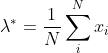 Therefore λ is the mean of the given logged data for 35 of his rides. After summing up all the values and dividing it by 35 will result 1.94
(λ = 1.94)


In [ ]:
given_data = [1 ,3 ,2, 0, 2, 4, 3, 2, 3, 4, 0, 1, 1, 3, 3, 2, 1, 1, 4, 3, 1, 1, 1, 1, 1, 2, 5, 2, 0, 1, 3, 0, 4, 2, 1]
mle = sum(given_data) / 35
print(format(mle))

1.9428571428571428


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import gamma

If we use the above equation or the mean formulae for the calculation of the λ value, we get the same result 1.94

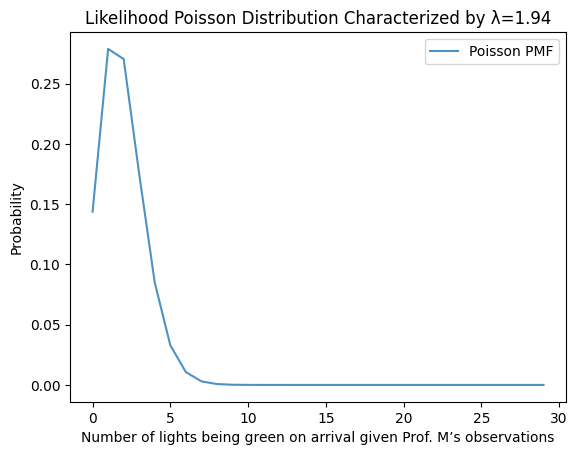

In [ ]:
xs = np.arange(0, 30)
ys = poisson.pmf(xs, 1.94)
plt.plot(xs, ys, label='Poisson PMF',alpha=0.8)
plt.title('Likelihood Poisson Distribution Characterized by λ=1.94')
plt.xlabel('Number of lights being green on arrival given Prof. M’s observations')
plt.ylabel('Probability')
plt.legend()
plt.show()

We use matplotlib to plot the number of lights being green on arrival vs probability. As λ = 1.94, we can infer from the above graph that highest probability in turning the lights green is around 0.3 and count of lights turning green were between 0 to 5.

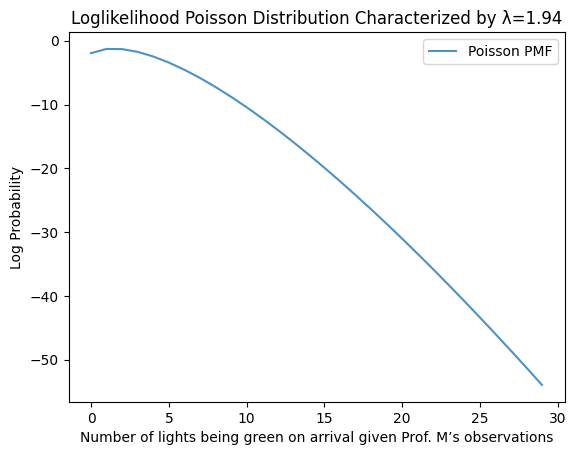

In [ ]:
xs = np.arange(0, 30)
ys = poisson.logpmf(xs, 1.94)
plt.plot(xs, ys, label='Poisson PMF',alpha=0.8)
plt.title('Loglikelihood Poisson Distribution Characterized by λ=1.94')
plt.xlabel('Number of lights being green on arrival given Prof. M’s observations')
plt.ylabel('Log Probability')
plt.legend()
plt.show()

The above is a matplot of a logarithmic pmf of the poisson distribution of the MLE

In [ ]:
xs = np.arange(0, 30)
loglikelihood_mle = np.sum(poisson.logpmf(given_data,mle))
loglikelihood_05 = np.sum(poisson.logpmf(given_data,0.5))
loglikelihood_1 = np.sum(poisson.logpmf(given_data,1))
loglikelihood_35 = np.sum(poisson.logpmf(given_data,3.5))
loglikelihood_25 = np.sum(poisson.logpmf(given_data,2.5))
loglikelihood_3 = np.sum(poisson.logpmf(given_data,3))

print("loglikelihood with MLE(λ=1.94): ", format(loglikelihood_mle, '.3f'))
print("\n")
print("loglikelihood with (λ=0.5): ",format(loglikelihood_05, '.3f'))
print("loglikelihood with (λ=1): ",format(loglikelihood_1, '.3f'))
print("loglikelihood with (λ=2.5): ",format(loglikelihood_25, '.3f'))
print("loglikelihood with (λ=3): ",format(loglikelihood_3, '.3f'))
print("loglikelihood with (λ=3.5): ",format(loglikelihood_35, '.3f'))

loglikelihood with MLE(λ=1.94):  -57.731


loglikelihood with (λ=0.5):  -99.528
loglikelihood with (λ=1):  -69.894
loglikelihood with (λ=2.5):  -60.086
loglikelihood with (λ=3):  -65.188
loglikelihood with (λ=3.5):  -72.206


From the above loglikelihood values with different λ-values shows the trend. Calculated λ-value is 1.94 and to test the MLE I took λ values (0.5, 1 ,2.5 ,3 , 3.5).
We can infer that, log-likelihood values decreases for all lambda values except, for the value 1.94 it suggests that the likelihood is maximized around the MLE, which is expected.

Therefore, calculated lambda value (λ=1.94) is Maximum Likelihood Estimation.

 .

Gamma(α, β) distribution is a conjugate prior to Poisson-likelihood distribution. Let's assume that the observed mean, 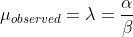


In [ ]:
total_ride = 100
number_ofgreens = 300

prior_mean = number_ofgreens / total_ride
beta = 1.0
alpha = prior_mean * beta

print("Shape parameter (α):", alpha)
print("Scale parameter (β):", beta)


Shape parameter (α): 3.0
Scale parameter (β): 1.0


We use β=1, because we wanted to find the mean of the gamma distribution, to simplify the calculations and interpretations, we chose its value as 1.

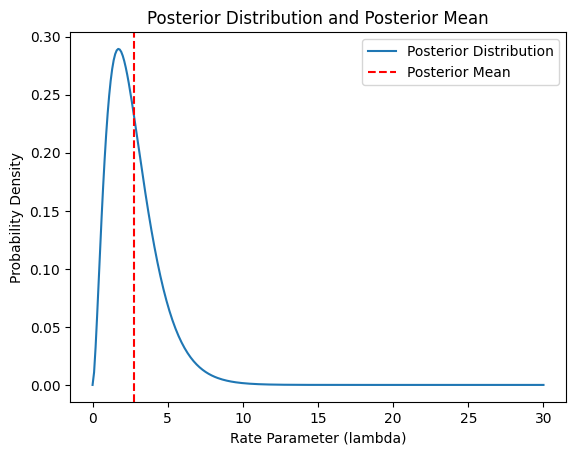

In [ ]:
#CHECK THE CODE, CLARIFY WITH FACULTY IN THE CLASS, NOT CLEAR
#alphaP = alpha + number_ofgreens #368 total
#betaP = beta + total_ride #135 total
alphaP = 368
betaP = 135
posterior_mean = alphaP / betaP

xs1 = np.linspace(0, 30, 300)
ys1 = gamma.pdf(xs1, posterior_mean)

plt.plot(xs1, ys1, label='Posterior Distribution')

plt.axvline(posterior_mean, color='red', linestyle='--', label='Posterior Mean')

plt.xlabel('Rate Parameter (lambda)')
plt.ylabel('Probability Density')
plt.title('Posterior Distribution and Posterior Mean')

plt.legend()
plt.show()


## **P2: CENTRAL LIMIT THEOREM**

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
from scipy.stats import shapiro

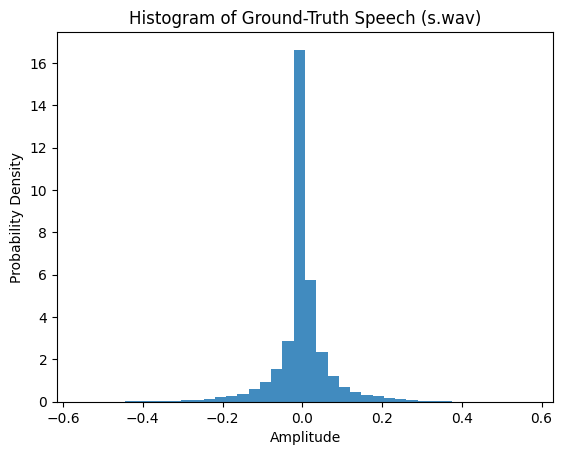

In [ ]:
# Load the ground-truth speech audio file (s.wav)
speech_file_path = '/content/drive/MyDrive/Colab drive/s.wav'
speech_data, _ = librosa.load(speech_file_path, sr=None)

# Plot the histogram
plt.hist(speech_data, bins=40, density=True, alpha=0.85)
plt.title('Histogram of Ground-Truth Speech (s.wav)')
plt.xlabel('Amplitude')
plt.ylabel('Probability Density')
plt.show()


I chose amplitude as an example feature for drawing a histogram because it is a fundamental characteristic of audio signals and is commonly used in signal processing and analysis. The amplitude of an audio signal provides information about how loud or soft a sound is at a particular point in time.

gives intensity of the audio signal

graph is too spiky and it might not be ideal to decide whether it resembles to gaussian distribution

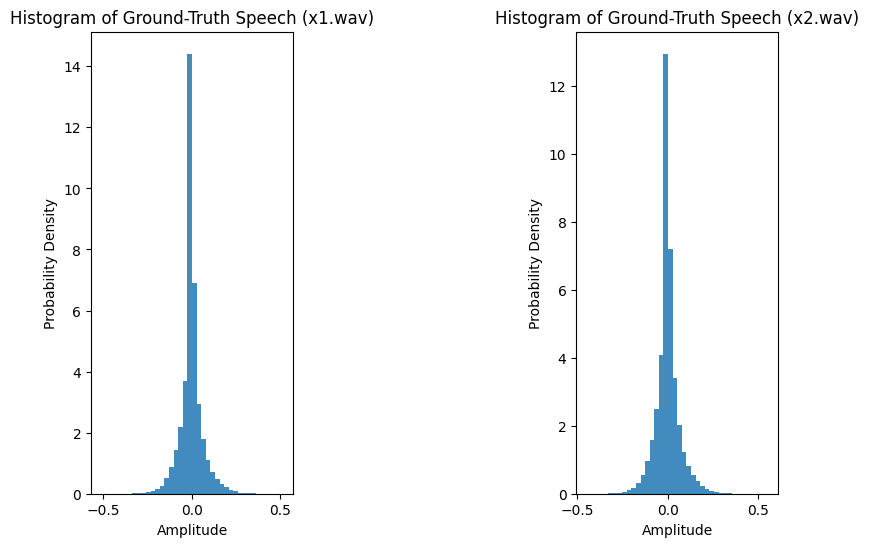

In [ ]:
# Load the ground-truth speech audio file (s.wav)
speech_file_path1 = '/content/drive/MyDrive/Colab drive/x1.wav'
speech_data1, _ = librosa.load(speech_file_path1, sr=None)

speech_file_path2 = '/content/drive/MyDrive/Colab drive/x2.wav'
speech_data2, _ = librosa.load(speech_file_path2, sr=None)

plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
# Plot the histogram
plt.hist(speech_data1,bins=40, density=True, alpha=0.85)
plt.title('Histogram of Ground-Truth Speech (x1.wav)')
plt.xlabel('Amplitude')
plt.ylabel('Probability Density')

plt.subplot(1, 4, 3)
plt.hist(speech_data2, bins=40, density=True, alpha=0.85)
plt.title('Histogram of Ground-Truth Speech (x2.wav)')
plt.xlabel('Amplitude')
plt.ylabel('Probability Density')
plt.show()


As you can view the histograms of x1 and xw aduio file, you cannot determine the gaussian likeliness between the two because both are not noraml distribution (non gaussian distributions). To measure the gaussian likeliness to these kind of graph we use kurtosis as a measuring parameter.

In [ ]:
# Load the audio files
audio1 = '/content/drive/MyDrive/Colab drive/x1.wav'
audio2 = '/content/drive/MyDrive/Colab drive/x2.wav'
audio3 = '/content/drive/MyDrive/Colab drive/s.wav'

newaudio1, _ = librosa.load(audio1, sr=None)
newaudio2, _ = librosa.load(audio2, sr=None)
newaudio3, _ = librosa.load(audio3, sr=None)

# Standardize the signals
s1 = (newaudio1 - np.mean(newaudio1)) / np.std(newaudio1)
s2 = (newaudio2 - np.mean(newaudio2)) / np.std(newaudio2)
s3 = (newaudio3 - np.mean(newaudio3)) / np.std(newaudio3)

						 Histograms of the three Standardized Signals


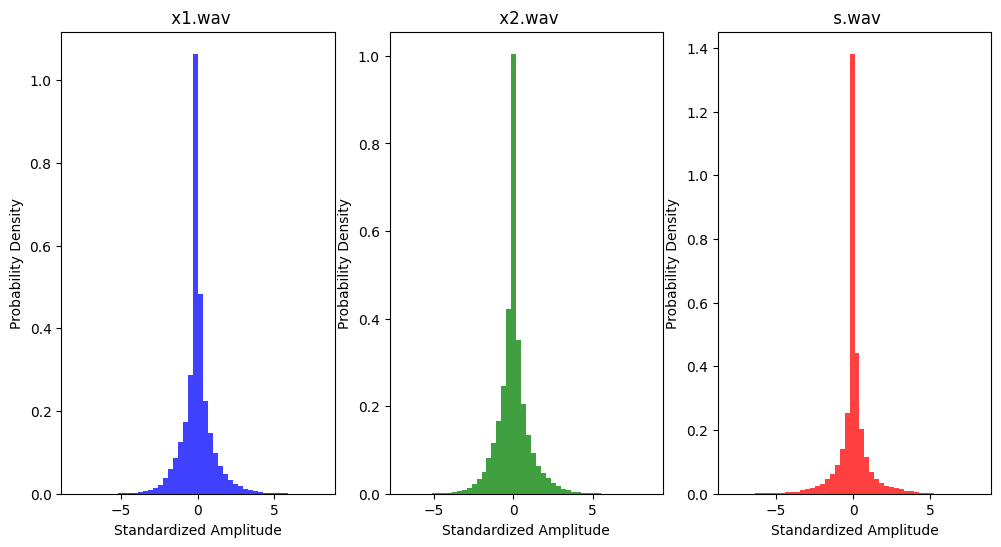

Kurtosis of Standardized Signal x1.wav: 4.907142151253452
Kurtosis of Standardized Signal x2.wav: 3.8733277320861816
Kurtosis of Standardized Signal s.wav: 7.293440271987704


In [ ]:
# Calculate kurtosis for the standardized signals
kurtosis_1 = kurtosis(s1)
kurtosis_2 = kurtosis(s2)
kurtosis_3 = kurtosis(s3)

# Plot histograms
print("\t\t\t\t\t\t Histograms of the three Standardized Signals")
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(s1, bins=50, density=True, alpha=0.75, color='b')
plt.title(' x1.wav')
plt.xlabel('Standardized Amplitude')
plt.ylabel('Probability Density')

plt.subplot(1, 3, 2)
plt.hist(s2, bins=50, density=True, alpha=0.75, color='g')
plt.title(' x2.wav')
plt.xlabel('Standardized Amplitude')
plt.ylabel('Probability Density')


plt.subplot(1, 3, 3)
plt.hist(s3, bins=50, density=True, alpha=0.75, color='r')
plt.title(' s.wav')
plt.xlabel('Standardized Amplitude')
plt.ylabel('Probability Density')

plt.show()

# Print kurtosis values
print(f"Kurtosis of Standardized Signal x1.wav: {kurtosis_1}")
print(f"Kurtosis of Standardized Signal x2.wav: {kurtosis_2}")
print(f"Kurtosis of Standardized Signal s.wav: {kurtosis_3}")

From the above three histograms its difficult to determine which one is more like gaussian distribution because all the three look like non-gaussian distributions with slight variations

High kurtosis values means more like non-gaussian behaviour. S.wav audio has more kurtosis values because it's a  non gaussian distribution. we can infer this while listening to the s.wav audio where prof k voice is very clear and has no noise in the background. Therefore number of sources is only 1 and that why it cannot have gaussian like distribution and kurtosis value is high.
S.wav is complete non-gaussian distribution

Whereas x1.wav and x2.wav is also a non gaussian distribution but not like s.wav. Its partially non-gaussian distribution and less than S.wav. When comapared to s.wav, x1.wav and x2.wav audio has more noises (sources). And when we listen both the audio we can infer that it has lot of background noises but its difficult to detemine which one is more noiser between the two. Here, where kurtosis values places a role. From the histograms and values calculated above defines that X2.wav is much noiser than x1.wav as the value of x2 is lesser than x1.

Therefore, X2.wav has the most interfering sources among the three audio files

## **P3: Eigenvectors for Two-Notes**

In [ ]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

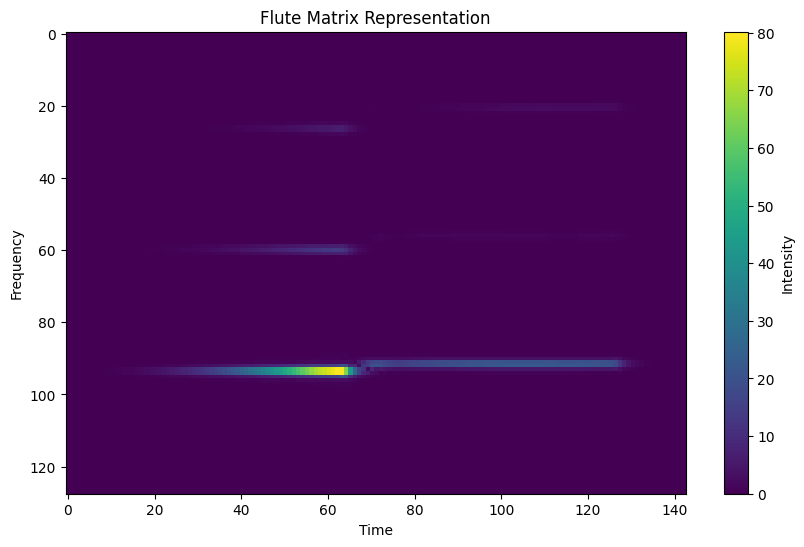

In [ ]:
flute_path_in_drive = '/content/drive/MyDrive/Colab drive/flute.mat'

# Load the 'flute.mat' file
flute_data = scipy.io.loadmat(flute_path_in_drive)['X']
plt.figure(figsize=(10, 6))
# Plot the matrix using a color map
plt.imshow(flute_data, cmap='viridis', aspect='auto', origin='upper')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Flute Matrix Representation')
plt.colorbar(label='Intensity')
plt.show()


The above plot is the original Flute Matrix, where the first note and second note are displayed with respect to their intensities

In [ ]:
s_matrix = np.dot(flute_data, flute_data.T)
print(s_matrix.shape)

(128, 128)


For mathetical computation, to find eigen vector using power iteraion, we need a square matrix. Therefore multiplying the matrx with its own transpose results a new square matrix

0.2869807556160853
Algorithm has not converged yet (Euclidean distance above threshold)


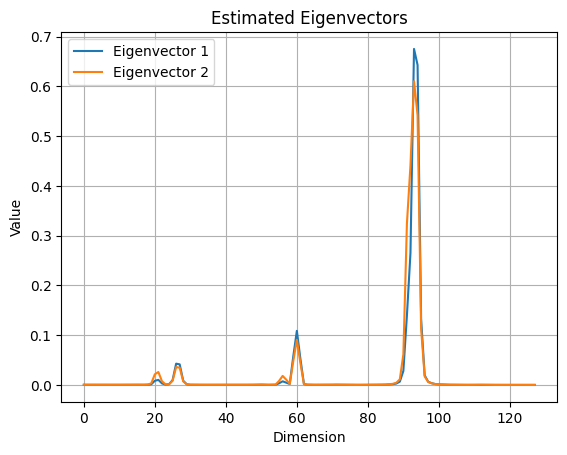

In [ ]:
def power_iteration(matrix, num_iterations):
    # Initialize a random vector as the starting vector
    eigenvector = np.random.rand(matrix.shape[1],1)


    for _ in range(num_iterations):

        eigenvector = np.dot(matrix, eigenvector)

        # Normalize the eigenvector
        eigenvector /= np.linalg.norm(eigenvector)

    return eigenvector

num_iterations = 1  # Number of iterations for power iteration
num_eigenvectors = 2   # Number of eigenvectors to estimate

eigenvectors = []
for _ in range(num_eigenvectors):
    eigenvector = power_iteration(s_matrix, num_iterations)
    eigenvectors.append(eigenvector)
#print(eigenvectors)

def euclidean_distance(v1, v2):
    return np.linalg.norm(v1 - v2)

threshold = 1e-10

# Compute Euclidean distance
euclidean_dist = euclidean_distance(eigenvectors[0], eigenvectors[1])
print(euclidean_dist)

# Check convergence
if euclidean_dist < threshold:
    print("Algorithm converged (Euclidean distance below threshold)")
else:
    print("Algorithm has not converged yet (Euclidean distance above threshold)")

plt.figure()
for i, eigenvector in enumerate(eigenvectors):
    plt.plot(eigenvector, label=f'Eigenvector {i+1}')

plt.xlabel('Dimension')
plt.ylabel('Value')
plt.title('Estimated Eigenvectors')
plt.legend()
plt.grid(True)
plt.show()


A Euclidean distance of
0.2869807556160853
  between the two eigenvectors indicates that they are very close to each other in terms of their direction or orientation in the vector space. Therefore, the result of two eigen vectors after performing power iteration are not same they are different. We can measure the differences by verifying with Euclidean distance between those two eigen vectors


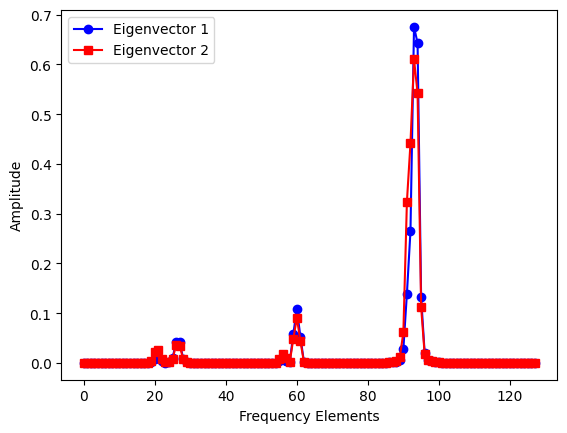

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(128), eigenvectors[0], label='Eigenvector 1', color='blue', marker='o')
ax.plot(range(128), eigenvectors[1], label='Eigenvector 2', color='red', marker='s')
ax.set_xlabel('Frequency Elements')
ax.set_ylabel('Amplitude')
ax.legend()
plt.show()

The above plot depicts the two eigenvectors with respect to the Amplitude and Frequencty, where we can visualize that they are very different.

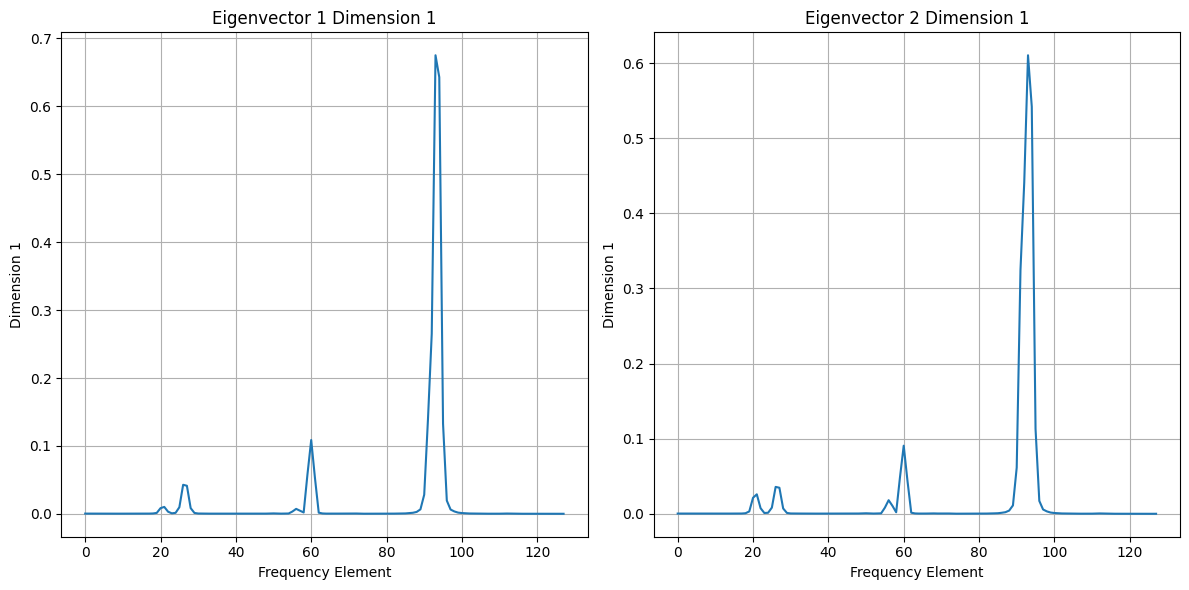

In [ ]:
num_dimensions = eigenvectors[0].shape[1]

plt.figure(figsize=(12, 6))
for i in range(num_dimensions):
    plt.subplot(num_dimensions, 2, 2*i+1)
    plt.plot(eigenvectors[0][:, i])
    plt.xlabel('Frequency Element')
    plt.ylabel(f'Dimension {i+1}')
    plt.title(f'Eigenvector 1 Dimension {i+1}')
    plt.grid(True)

    plt.subplot(num_dimensions, 2, 2*i+2)
    plt.plot(eigenvectors[1][:, i])
    plt.xlabel('Frequency Element')
    plt.ylabel(f'Dimension {i+1}')
    plt.title(f'Eigenvector 2 Dimension {i+1}')
    plt.grid(True)

plt.tight_layout()
plt.show()

The above two line graph depicts more clearer with every nuance of the eigen vector.

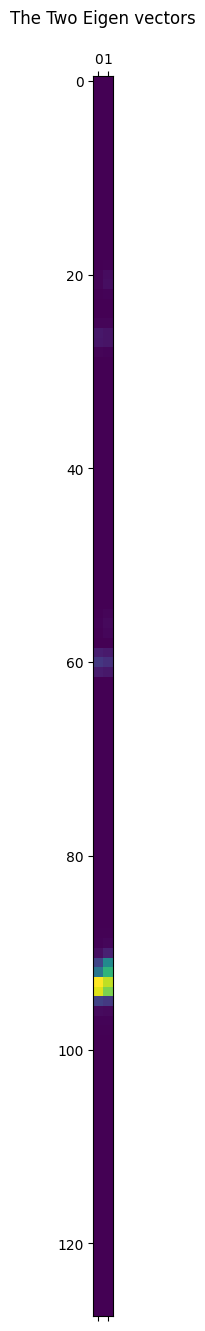

In [ ]:
#Concatenate the eigen vectors to plot
eigen_join = np.concatenate((eigenvectors[0].reshape(-1,1), eigenvectors[1].reshape(-1,1)),axis=1)
plt.matshow(eigen_join, cmap = 'viridis', interpolation = None)
plt.grid(False)
plt.title("The Two Eigen vectors\n")
plt.show()

Inorder to find the Temporal activations of the flute matrix, we need to concatenate the two eigen vectors into a single column vector as depicted above.

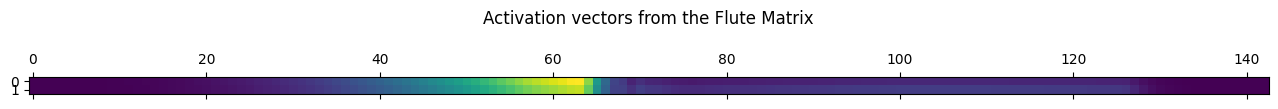

In [ ]:
#Finding temporal activation
t_activation = np.dot(eigen_join.T,flute_data)

plt.matshow(t_activation,cmap = 'viridis', interpolation = None)
plt.grid(False)
plt.title("Activation vectors from the Flute Matrix\n")
plt.show()

The true activaton vectors are displayd above. By performing a dot product between concatenated eigen vector and the original flute matrix we get the temporal activation. The equation to find the temporal activations is:

**Temporal activation = Transpose of Eigenvectors . X**

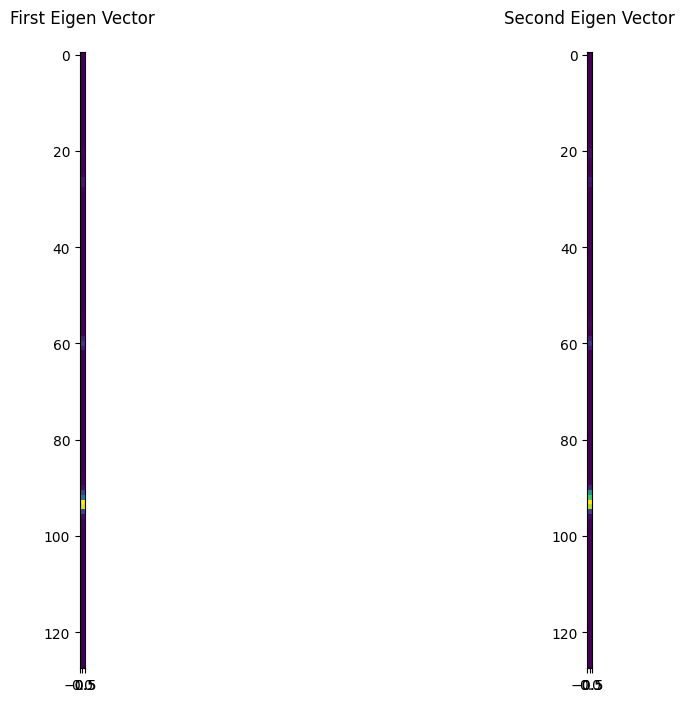

In [ ]:
plt.figure(figsize=(12, 8))
# Plot the first eigen vector
plt.subplot(1, 2, 1)
plt.imshow(eigenvectors[0], cmap='viridis', interpolation=None)
plt.grid(False)
plt.title("First Eigen Vector\n")

# Plot the second eigen vector
plt.subplot(1, 2, 2)
plt.imshow(eigenvectors[1], cmap='viridis', interpolation=None)
plt.grid(False)
plt.title("Second Eigen Vector\n")

plt.show()


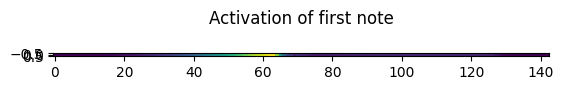

In [ ]:
fnote = t_activation[:1]
plt.imshow(fnote,cmap = 'viridis', interpolation = None)
plt.grid(False)
plt.title("Activation of first note\n")
plt.show()

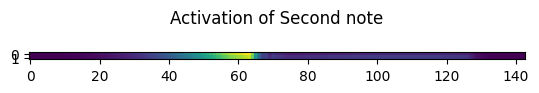

In [ ]:
snote = t_activation[:2]
plt.imshow(snote,cmap = 'viridis', interpolation = None)
plt.grid(False)
plt.title("Activation of Second note\n")
plt.show()

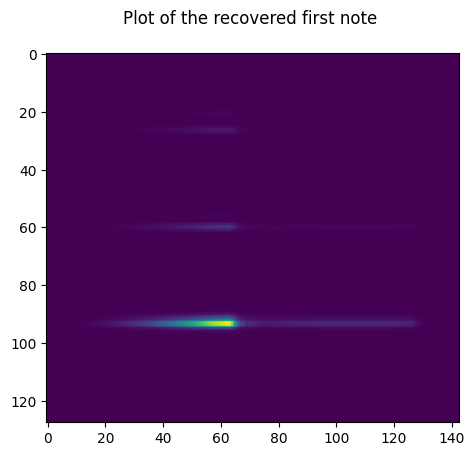

In [ ]:
# Recovering the first note of the flute matrix
R1 = np.dot(eigenvectors[0], fnote)
plt.imshow(R1, cmap = 'viridis')
plt.title("Plot of the recovered first note \n")
plt.show()

The above flute matrix depicts the reocovered first note from its eigen vector and temporal activation. Where only the first note is intensified. By performing the dot product of first eigen vector and first temporal activation we get the plot for first note. The equation to recover the first note is:

image.png

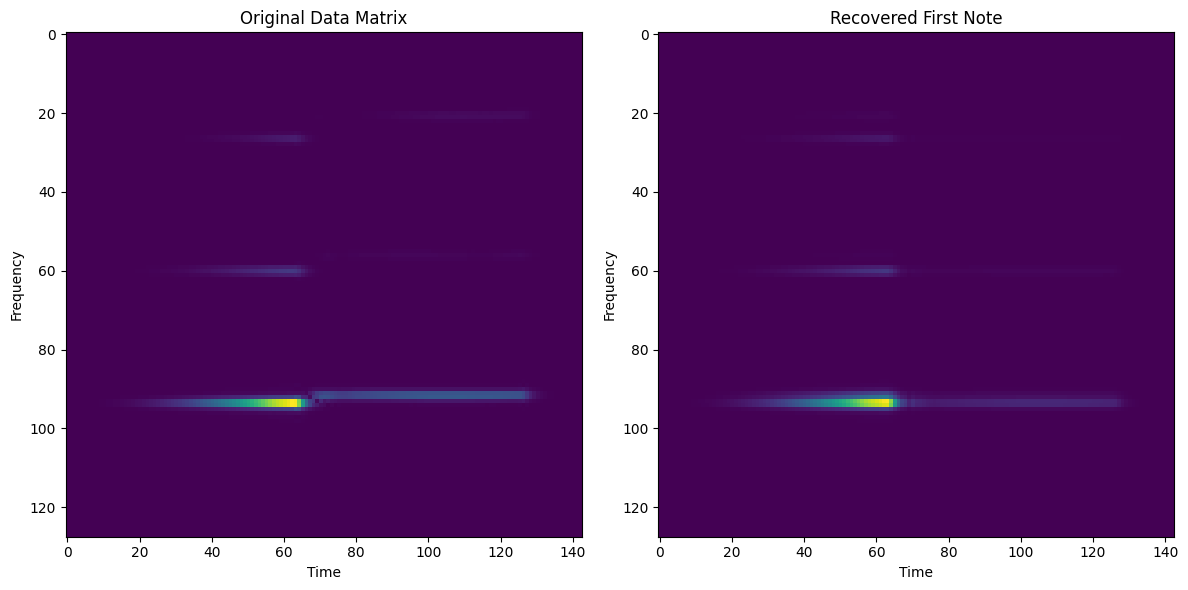

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original data matrix
axes[0].imshow(flute_data, aspect='auto', cmap='viridis', origin='upper')
axes[0].set_title('Original Data Matrix')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Frequency')
axes[0].set_aspect('auto')

# Plot the recovered first note
axes[1].imshow(R1, aspect='auto', cmap='viridis', origin='upper')
axes[1].set_title('Recovered First Note')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Frequency')
axes[1].set_aspect('auto')

plt.tight_layout()
plt.show()


From the above two matrixes we can infer that, the recovered first note is exactly same as in the original flute matrix. In the recovered First note plot, only the first note is more intensified than the other notes. Therefore, I have successfully recovered the first note from the original flute data by performing eigendecomposition using power iteration.

## **P4: BFGS**

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
clear_img = '/content/drive/MyDrive/Colab drive/sg_train.jpg'
noisy_train = '/content/drive/MyDrive/Colab drive/sgx_train.jpg'
noisy_test = '/content/drive/MyDrive/Colab drive/sgx_test.jpg'

clean_img = np.array(Image.open(clear_img))
noisy_train_img = np.array(Image.open(noisy_train))
noisy_test_img = np.array(Image.open(noisy_test))


target_img = clean_img.astype(np.float32) / 255.0
ntrain_img = noisy_train_img.astype(np.float32) / 255.0
ntest_img = noisy_test_img.astype(np.float32) / 255.0

In [ ]:
patch_size = 15
stride = 1
patches = []

for i in range(0, ntrain_img.shape[0] - patch_size + 1, stride):
    for j in range(0, ntrain_img.shape[1] - patch_size + 1, stride):
        patch = ntrain_img[i:i+patch_size, j:j+patch_size]
        patches.append(patch)

flat_patch = [patch.flatten() for patch in patches]
X_matrix = np.column_stack(flat_patch)
print(X_matrix.shape)

(225, 34596)


I found the X matrix patch wise by sliding top left corner to bottom right corner of the image

In [ ]:
def initial_filter(filter_size):

    f = np.random.randn(filter_size, filter_size)
    return f

filter_size = 15
f = initial_filter(filter_size)
f = f.reshape(-1,1)
ft = f.T
print("Randomly initialized filter:")
print(f.shape)

Randomly initialized filter:
(225, 1)


In [ ]:
def pm(b):

  plt.imshow(b, cmap='gray')
  plt.axis('off')
  plt.show()

In [ ]:
#Logistic function or sigmoid function
def g(x):
    return 1 / (1 + np.exp(-x))


In [ ]:
a = target_img

border_size = 7

cropped_S = a[border_size:-border_size, border_size:-border_size]
cropped_vector = cropped_S.flatten()

s = cropped_vector.reshape(-1, 1)

print("Shape of column vector:", s.shape)

Shape of column vector: (34596, 1)


I have cropped the targeted image by removing the borders of the image without misplacing the central point of the each pixel

In [ ]:
# Optimizing the filter by using gradient descent to denoise the image

def loss_function(v):
      N = 34596
      t = np.dot(v,v.T)
      loss = t/N
      return loss

def gdash(x):
  return g(x)*(1-g(x))


error, iterations = [],[]
iter = 15000
lrate = 0.1
for i in range(iter):
  y = g(np.dot(f.T,X_matrix))

  diff = s.T - y
  error.append(loss_function(diff))
  iterations.append(i)

  gdiff = gdash(np.dot(f.T,X_matrix))

  mult = diff * gdiff
  mult = np.reshape(mult,(34596,1))
  mult = np.dot(X_matrix,mult)
  partialdiff = (-2/34596)*mult

  f = f - lrate * partialdiff

  if i%500 == 0:
    print("Loss function value for", i,"iterations", loss_function(diff))


Loss function value for 0 iterations [[0.08263013]]
Loss function value for 500 iterations [[0.08161778]]
Loss function value for 1000 iterations [[0.08065759]]
Loss function value for 1500 iterations [[0.07974495]]
Loss function value for 2000 iterations [[0.0788758]]
Loss function value for 2500 iterations [[0.07804649]]
Loss function value for 3000 iterations [[0.07725383]]
Loss function value for 3500 iterations [[0.07649498]]
Loss function value for 4000 iterations [[0.07576744]]
Loss function value for 4500 iterations [[0.07506902]]
Loss function value for 5000 iterations [[0.07439778]]
Loss function value for 5500 iterations [[0.07375203]]
Loss function value for 6000 iterations [[0.07313028]]
Loss function value for 6500 iterations [[0.07253119]]
Loss function value for 7000 iterations [[0.0719536]]
Loss function value for 7500 iterations [[0.07139648]]
Loss function value for 8000 iterations [[0.07085888]]
Loss function value for 8500 iterations [[0.07033999]]
Loss function va

Denoised Image from Gradient Descent


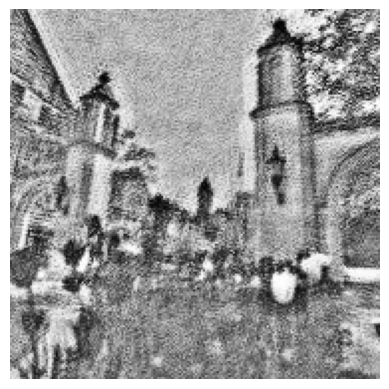

In [ ]:
result = np.dot(f.T , X_matrix)
r1 = g(result)
r1 = np.reshape(r1, (186,186))
print("Denoised Image from Gradient Descent")
pm(r1)

This is the denoised image that has been generated by the filter using gradient descent. And the loss function value after optimizing filter is very less. Therefore the denoised image is optimal result generated using the gradient descent

In [ ]:
nested_list = error
single_list = [item[0, 0] for item in nested_list]

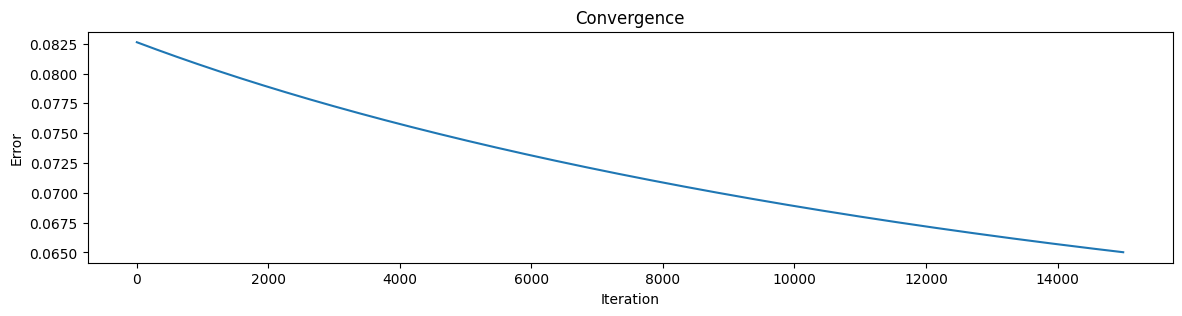

In [ ]:
width = 14
height = 3

fig, ax = plt.subplots(figsize=(width, height))
ax.plot(iterations, single_list)

ax.set_xlabel('Iteration')
ax.set_ylabel('Error')
ax.set_title('Convergence')
plt.show()

This is the convergence of the gradient descent plotted by error vs iteration. We can infer that the error loss is gradually converging after 140000 iterations. Hence, we can reduce the total error with increase in iterations.

Now, applying thet optimized filter on a new test noise image

In [ ]:

patch_size = 15
stride = 1
patches = []

for i in range(0, ntest_img.shape[0] - patch_size + 1, stride):
    for j in range(0, ntest_img.shape[1] - patch_size + 1, stride):
        patch = ntest_img[i:i+patch_size, j:j+patch_size]
        patches.append(patch)

flat_patch = [patch.flatten() for patch in patches]
T_matrix = np.column_stack(flat_patch)
print(T_matrix.shape)

(225, 34596)


In [ ]:

z = target_img
border_size = 7

ab = z[border_size:-border_size, border_size:-border_size]
abc = ab.flatten()
h = abc.reshape(-1, 1)

print("Shape of column vector:", h.shape)

Shape of column vector: (34596, 1)


In [ ]:
# Optimizing the filter by using gradient descent to denoise the image

def loss_function(v):
      N = 34596
      t = np.dot(v,v.T)
      loss = t/N
      return loss

def gdash(x):
  return g(x)*(1-g(x))


error1, iterations1 = [],[]
iter = 10000
lrate = 0.001
for i in range(iter):
  y = g(np.dot(f.T,T_matrix))

  diff = h.T - y
  error1.append(loss_function(diff))
  iterations1.append(i)

  gdiff = gdash(np.dot(f.T,T_matrix))

  mult = diff * gdiff
  mult = np.reshape(mult,(34596,1))
  mult = np.dot(T_matrix,mult)
  partialdiff = (-2/34596)*mult

  f = f - lrate * partialdiff

  if i%500 == 0:
    print("Loss function value for", i,"iterations", loss_function(diff))


Loss function value for 0 iterations [[0.10696608]]
Loss function value for 500 iterations [[0.10695714]]
Loss function value for 1000 iterations [[0.1069482]]
Loss function value for 1500 iterations [[0.10693927]]
Loss function value for 2000 iterations [[0.10693034]]
Loss function value for 2500 iterations [[0.10692141]]
Loss function value for 3000 iterations [[0.10691249]]
Loss function value for 3500 iterations [[0.10690357]]
Loss function value for 4000 iterations [[0.10689466]]
Loss function value for 4500 iterations [[0.10688575]]
Loss function value for 5000 iterations [[0.10687684]]
Loss function value for 5500 iterations [[0.10686794]]
Loss function value for 6000 iterations [[0.10685905]]
Loss function value for 6500 iterations [[0.10685015]]
Loss function value for 7000 iterations [[0.10684127]]
Loss function value for 7500 iterations [[0.10683238]]
Loss function value for 8000 iterations [[0.1068235]]
Loss function value for 8500 iterations [[0.10681463]]
Loss function va

Denoised Image from Gradient Descent


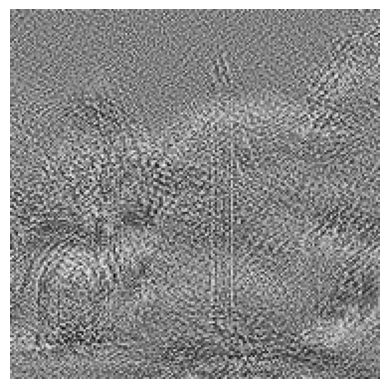

In [ ]:
found = np.dot(f.T , T_matrix)
k1 = g(found)
k1 = np.reshape(k1, (186,186))
print("Denoised Image from Gradient Descent")
pm(k1)

BFGS Calculation

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [6]:
patch_size = 15
stride = 1
patches = []

for i in range(0, ntrain_img.shape[0] - patch_size + 1, stride):
    for j in range(0, ntrain_img.shape[1] - patch_size + 1, stride):
        patch = ntrain_img[i:i+patch_size, j:j+patch_size]
        patches.append(patch)

flat_patch = [patch.flatten() for patch in patches]
B_matrix = np.column_stack(flat_patch)
print(B_matrix.shape)

(225, 34596)


In [7]:
j = target_img
border_size = 7
ab = j[border_size:-border_size, border_size:-border_size]
abc = ab.flatten()
sb = abc.reshape(-1, 1)
print("Shape of column vector:", sb.shape)

Shape of column vector: (34596, 1)


In [8]:
#Logistic function or sigmoid function
def g(x):
    return 1 / (1 + np.exp(-x))


In [10]:
def initial_filter(filter_size):
    # Generate a random filter matrix
    fb = np.random.randn(filter_size, filter_size)
    return fb

# Example usage
filter_size = 15  # Example filter size
fb = initial_filter(filter_size)
fb = fb.reshape(-1,1)
fbt = fb.T
print("Randomly initialized filter:")
print(fb.shape)


Randomly initialized filter:
(225, 1)


In [14]:
#Initialize the G as a identity matrix
l= np.eye(15)
G = l.reshape(-1, 1)
print(G.shape)

(225, 1)


BFGS Implementation using Quasi Newton's method

In [ ]:
# Optimizing the filter by using BFGS to denoise the image

def loss_function(v):
      N = 34596            # number of patches found
      t = np.dot(v,v.T)
      loss = t/N
      return loss

def gdash(x):
  return g(x)*(1-g(x))

error1, iterations1 = [],[]
iter = 10

def gfi(fb):
  y1 = g(np.dot(fb.T,B_matrix))
  diff1 = sb.T - y1
  error1.append(loss_function(diff1))
  iterations1.append(i)

  gdiff1 = gdash(np.dot(fb.T,B_matrix))

  mult1 = diff1 * gdiff1
  mult1 = np.reshape(mult1,(34596,1))
  mult1 = np.dot(B_matrix,mult1)
  partialdiff1 = (-2/34596)*mult1
  gf = -partialdiff1
  return gf


for i in range(iter):

    fbi = fb - G * gfi(fb)
    print((G* gfi(fb)).shape)
    print(fbi)
    p = fbi - fb
    v = gfi(fbi) - gfi(fb)

    u1 = p/p.T*v
    u2 = G*v/v.T*G*v
    u = u1-u2

    G1 = p*p.T / p.T*v
    g1 = G*v
    G2 = g1*v.T*G / v.T*G*v
    g2 = v.T*G*v
    G3 = g2*u*u.T

    G = G+ G1 - G2 + G3
    fb = fbi

    # if i%5 == 0:
    #   print("Loss function value for", i,"iterations", loss_function(diff1))


In [15]:
%%shell
jupyter nbconvert --to html ///content/MLSP-H1.ipynb

[NbConvertApp] Converting notebook ///content/MLSP-H1.ipynb to html
[NbConvertApp] Writing 2283276 bytes to /content/MLSP-H1.html
